<a href="https://colab.research.google.com/github/MpRonald/C/blob/main/FINAL_KMeans_Clusterization_TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Local onde foi baixado o dataset<br>
https://archive.ics.uci.edu/ml/machine-learning-databases/00222/
<br>
#### Link do raw do GitHub<br>
https://raw.githubusercontent.com/MpRonald/TCC/main/bank-full.csv

In [1]:
# conectando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist, pdist
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lendo dataset (diponível no GitHub) **
url = 'https://raw.githubusercontent.com/MpRonald/datasets/main/bank-full.csv'
dataset = pd.read_csv(url, sep=';')
data = dataset.drop(['duration'], axis=1)
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


_______________________________________________________________________
<font size=6 color='white' font ><b>Analise Exploratória de Dados



# Verificando dataframe

In [4]:
# verificando o numero de colunas e linhas**
data.shape

(45211, 16)

In [5]:
# verificando os nomes das colunas**
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [6]:
# verificando media, desvio padrao, menor valor, quartis, maior valor de cada coluna numérica**
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Verificando a existência de OutLiers



In [7]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [8]:
data.loc[data['pdays'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes


##### Acima foi constatado que a variável 'pdays' contém muitos valores de valor -1, iremos fazer a moficicação para o valor zero para que não haja uma indução de peso da variável ao fazer o treinamento e validação do nosso modelo

In [9]:
data.loc[data['pdays'] < 0, 'pdays'] = 0

In [10]:
data.pdays.value_counts()

0      36954
182      167
92       147
91       126
183      126
       ...  
449        1
452        1
648        1
595        1
530        1
Name: pdays, Length: 559, dtype: int64

In [11]:
# verificando a quantidade de dados nulos**
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
# verificando se existem dados duplicados
data.duplicated().sum()

16

In [13]:
# removendo linhas duplicadas
data = data.drop_duplicates()

In [14]:
# verificando o tipo de variavel**
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


In [15]:
dataset = data.drop('y', axis=1)
dataset = dataset.sample(n=1000, random_state=159)

In [16]:
lb = LabelEncoder()
dataset.job = lb.fit_transform(dataset.job) # job
dataset.marital = lb.fit_transform(dataset.marital) # marital
dataset.education = lb.fit_transform(dataset.education) # education
dataset.default = lb.fit_transform(dataset.default) # default
dataset.housing = lb.fit_transform(dataset.housing) # housing
dataset.loan = lb.fit_transform(dataset.loan) # loan
dataset.contact = lb.fit_transform(dataset.contact) # contact
dataset.month = lb.fit_transform(dataset.month) # month
dataset.poutcome = lb.fit_transform(dataset.poutcome) # poutcome

In [17]:
# creating model
kmeans = KMeans(n_clusters = 3, random_state = 159).fit(dataset)

In [18]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
# creating a Cluster map
cm = pd.DataFrame(dataset)
cm['cluster'] = kmeans.labels_

In [20]:
cm.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,cluster
11202,47,7,0,1,0,829,0,1,2,18,6,2,0,0,3,1
17980,45,1,1,1,0,3,0,1,1,30,5,2,0,0,3,1
13663,60,5,0,0,0,1017,0,0,2,9,5,20,0,0,3,1
799,56,5,1,1,0,0,1,0,2,7,8,4,0,0,3,1
20867,31,9,1,1,0,-302,0,0,0,13,1,2,0,0,3,1
26338,30,7,1,1,0,586,1,0,0,20,9,6,176,4,0,1
17740,40,4,1,3,0,6,1,0,0,29,5,4,0,0,3,1
8159,35,9,1,1,0,1707,1,0,2,2,6,3,0,0,3,1
39881,50,9,1,1,0,3370,0,0,0,2,6,2,0,0,3,0
37850,54,5,0,2,0,2682,1,0,0,14,8,1,0,0,3,0


In [21]:
for i in range(0,3):
  print(f'Cluter = {i}: | Nº de Cluster:{len(cm[cm.cluster == i])}')

Cluter = 0: | Nº de Cluster:137
Cluter = 1: | Nº de Cluster:830
Cluter = 2: | Nº de Cluster:33


In [22]:
# reducing dimensionality
pca = PCA(n_components = 2).fit_transform(dataset)
len(pca)

1000

In [23]:
# Determinando um range de K
k_range = range(1,12)

# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada)
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [24]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [25]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [26]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]
soma_total

4893618167.141466

In [27]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

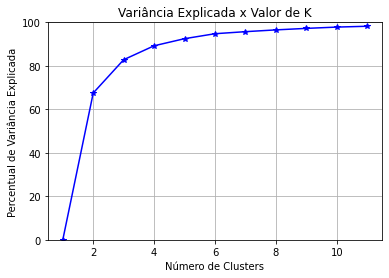

In [28]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [32]:
# Criando um modelo com K = 11
modelo_v1 = KMeans(n_clusters = 11)
modelo_v1.fit(pca)

KMeans(n_clusters=11)

In [34]:
pca.shape

(1000, 2)

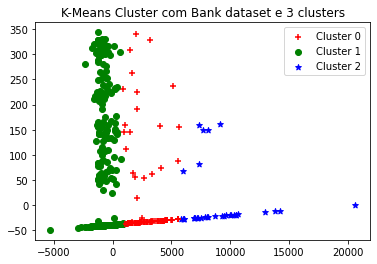

In [35]:
# generating 'labels' to clusters results
for i in range(0, pca.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca[i,0], pca[i,1], c = 'r', marker = '+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca[i,0], pca[i,1], c = 'g', marker = 'o')
  elif kmeans.labels_[i] == 2:
    c3 = pl.scatter(pca[i,0], pca[i,1], c = 'b', marker = '*')

    pl.legend([c1,c2,c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
    pl.title("K-Means Cluster com Bank dataset e 3 clusters")
pl.show()